#Señal EMG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import seaborn as sns
import re
from scipy.signal import firwin, lfilter,iirnotch

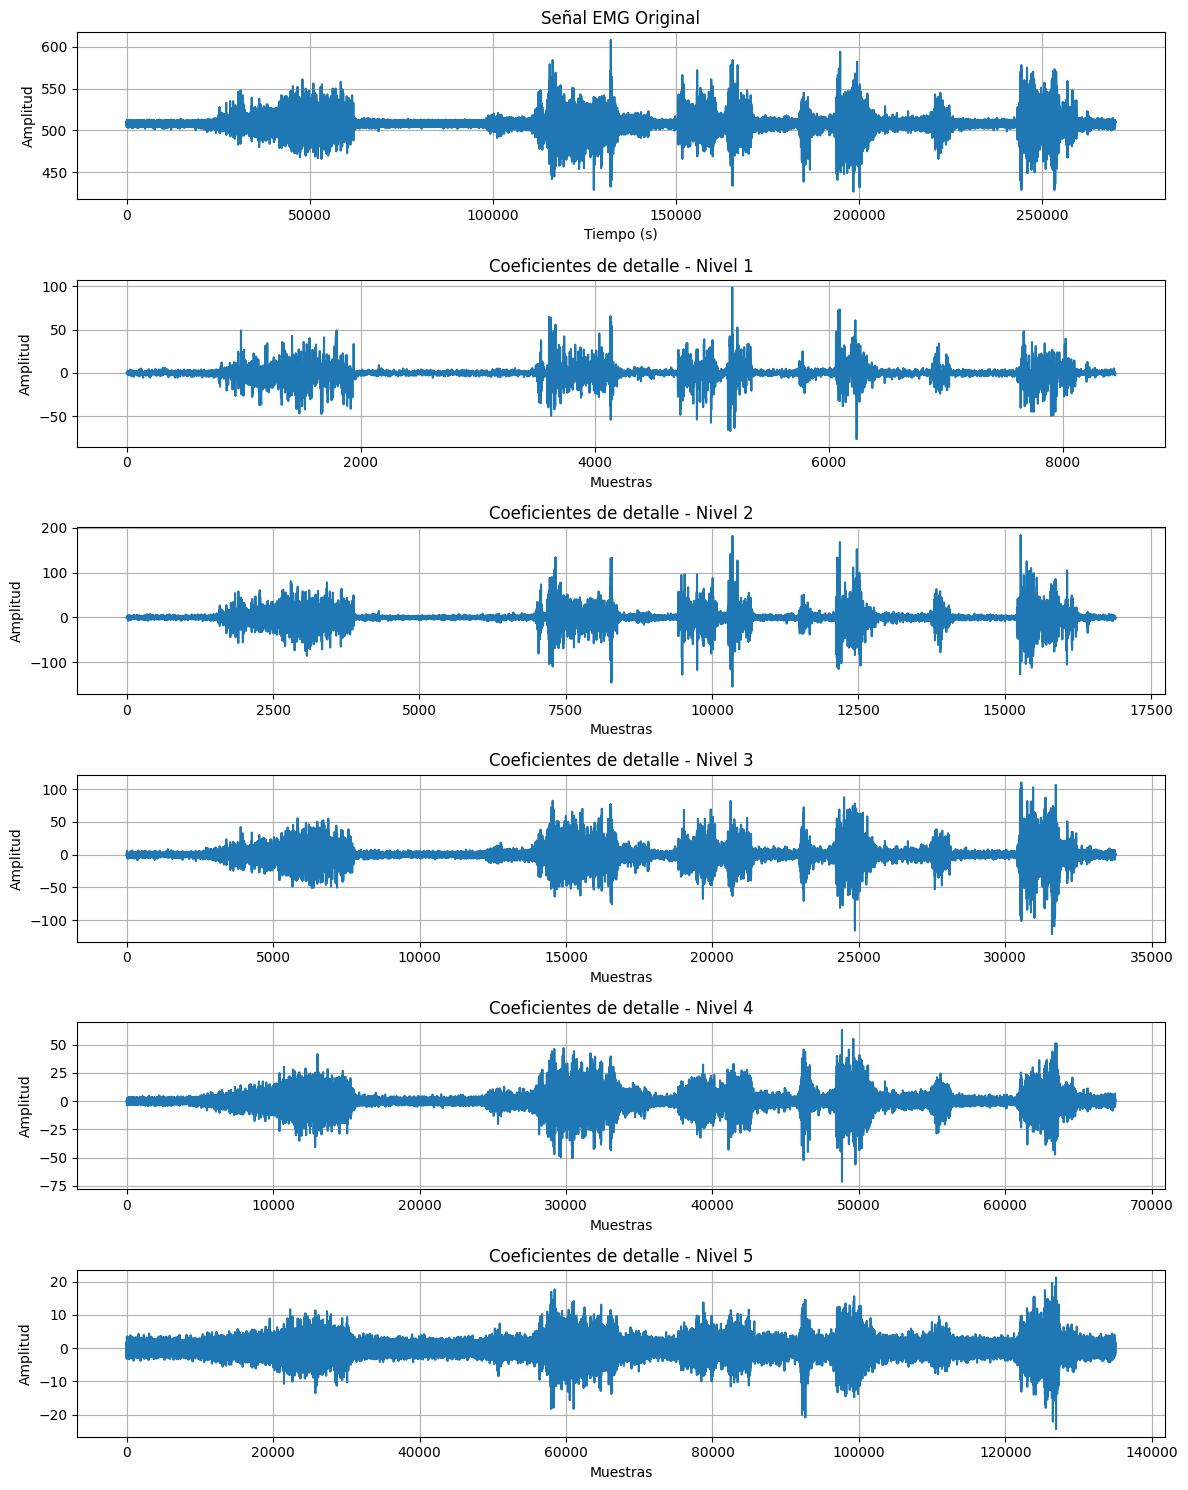

In [2]:

Fs = 1000
Ts=1/Fs
array_1 = np.loadtxt("/content/Reposo_EMG.txt")
array_2=  np.loadtxt("/content/Levantando_Mochila_EMG.txt")
array_3= np.loadtxt("/content/Fuerza_oponente_EMG.txt")

array_1 = array_1[:, 5]
array_2 =array_2[:, 5]
array_3 =array_3[:, 5]

# Aplicar la DWT
niveles = 5
coeficientes1= pywt.wavedec(array_1, 'db8', level=niveles)
coeficientes2= pywt.wavedec(array_2, 'db8', level=niveles)
coeficientes3= pywt.wavedec(array_3, 'db8', level=niveles)
num_plots = len(coeficientes2[1:]) + 1
# Graficar la señal original y los coeficientes de detalle
plt.figure(figsize=(12, 15))

plt.subplot(num_plots, 1, 1)
plt.plot(array_1)
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Plotear los coeficientes de detalle
for i, detail in enumerate(coeficientes1[1:], 1):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(detail)
    plt.title(f'Coeficientes de detalle - Nivel {i}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()


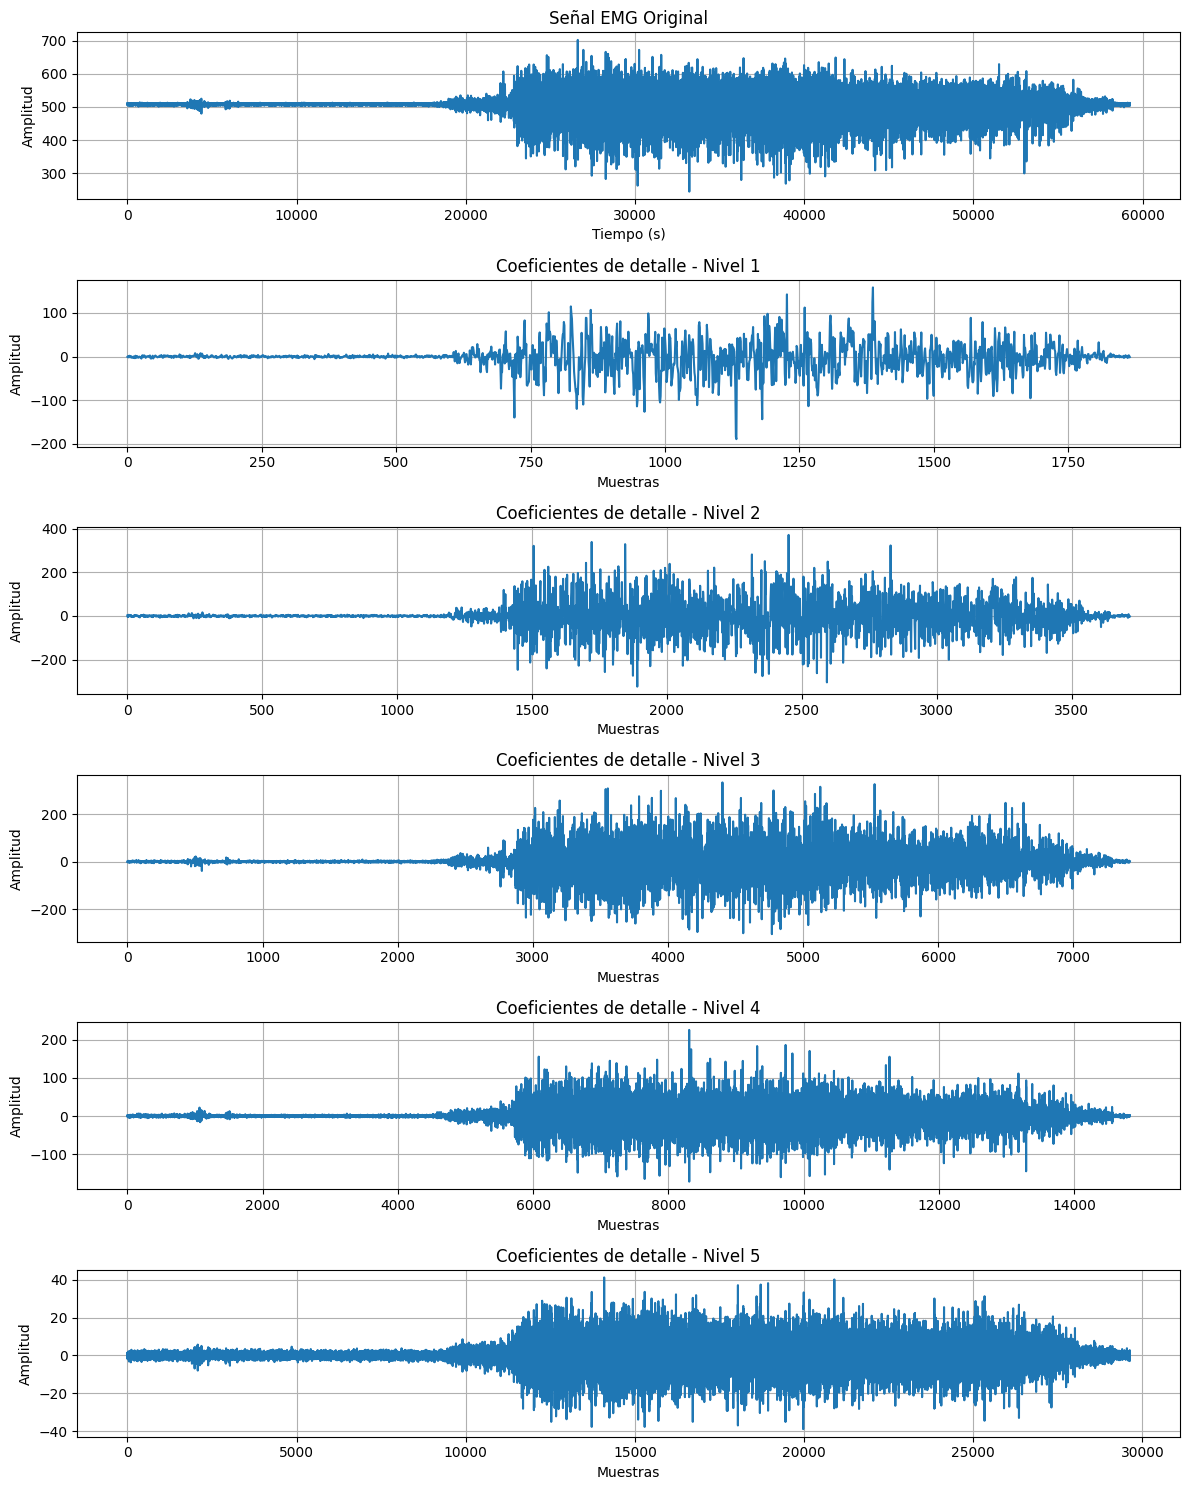

In [ ]:
plt.figure(figsize=(12, 15))

plt.subplot(num_plots, 1, 1)
plt.plot(array_2)
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Plotear los coeficientes de detalle
for i, detail2 in enumerate(coeficientes2[1:], 1):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(detail2)
    plt.title(f'Coeficientes de detalle - Nivel {i}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)
plt.tight_layout()
plt.show()

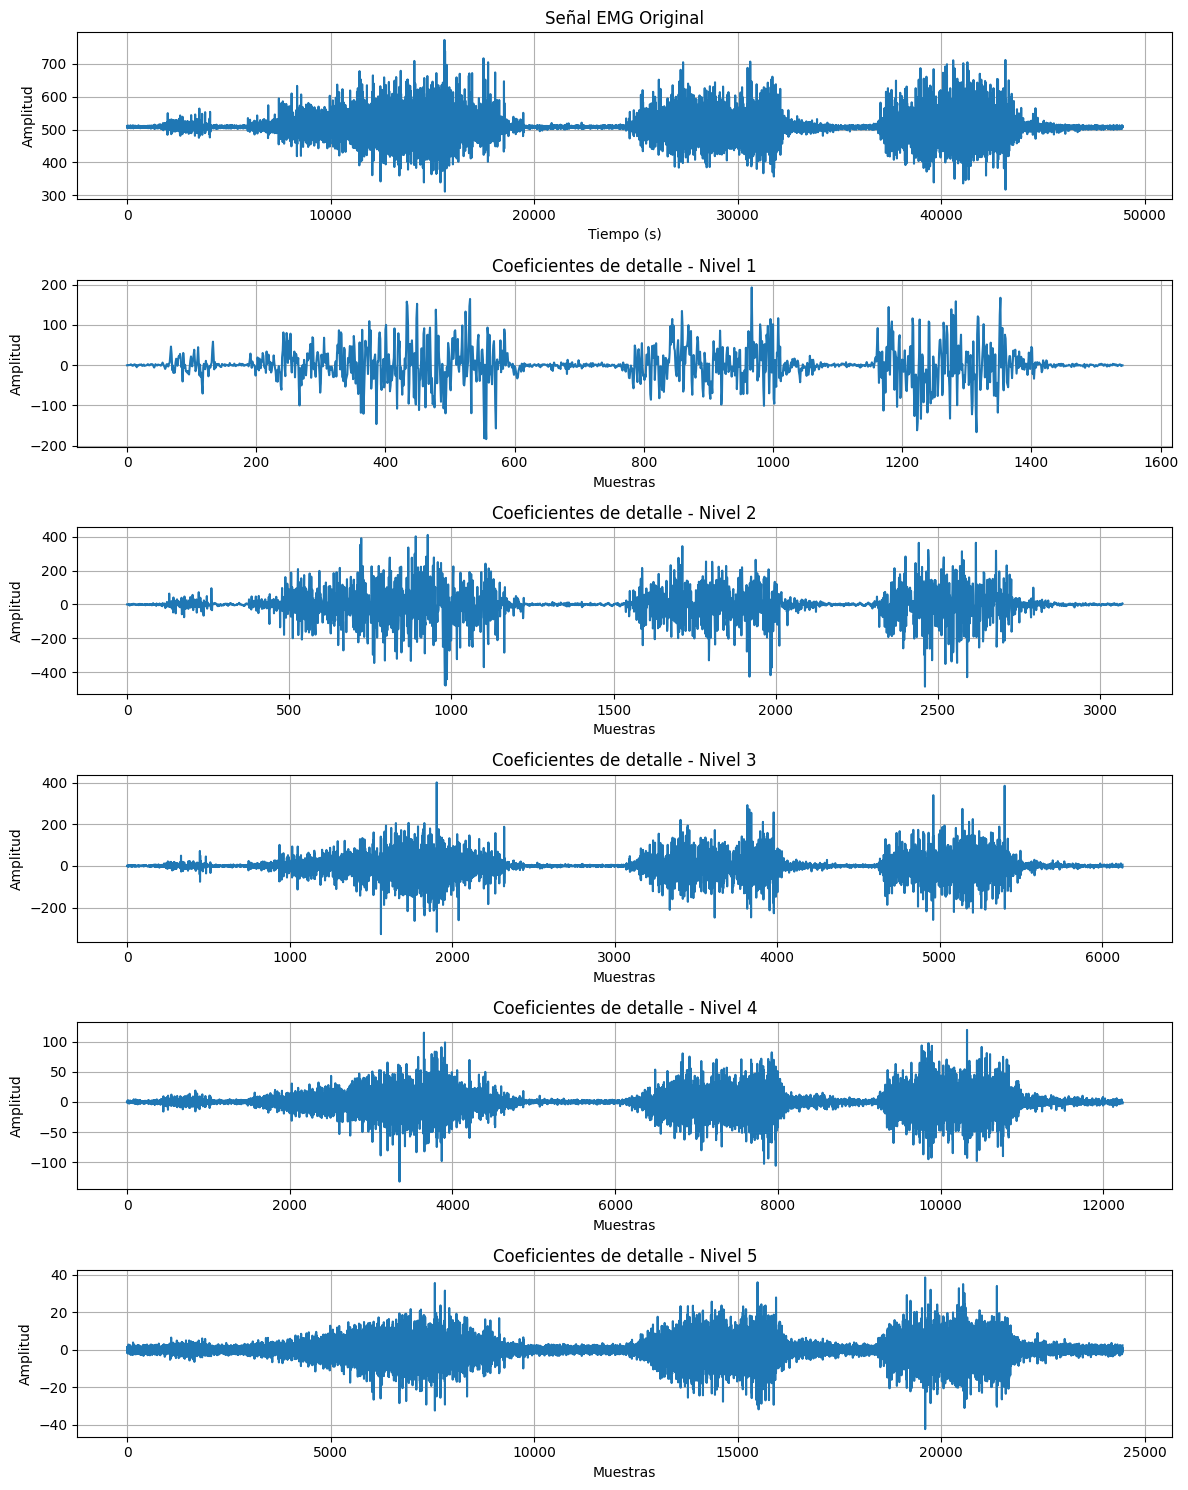

In [ ]:
plt.figure(figsize=(12, 15))
plt.subplot(num_plots, 1, 1)
plt.plot(array_3)
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Plotear los coeficientes de detalle
for i, detail3 in enumerate(coeficientes3[1:], 1):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(detail3)
    plt.title(f'Coeficientes de detalle - Nivel {i}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)
plt.tight_layout()
plt.show()

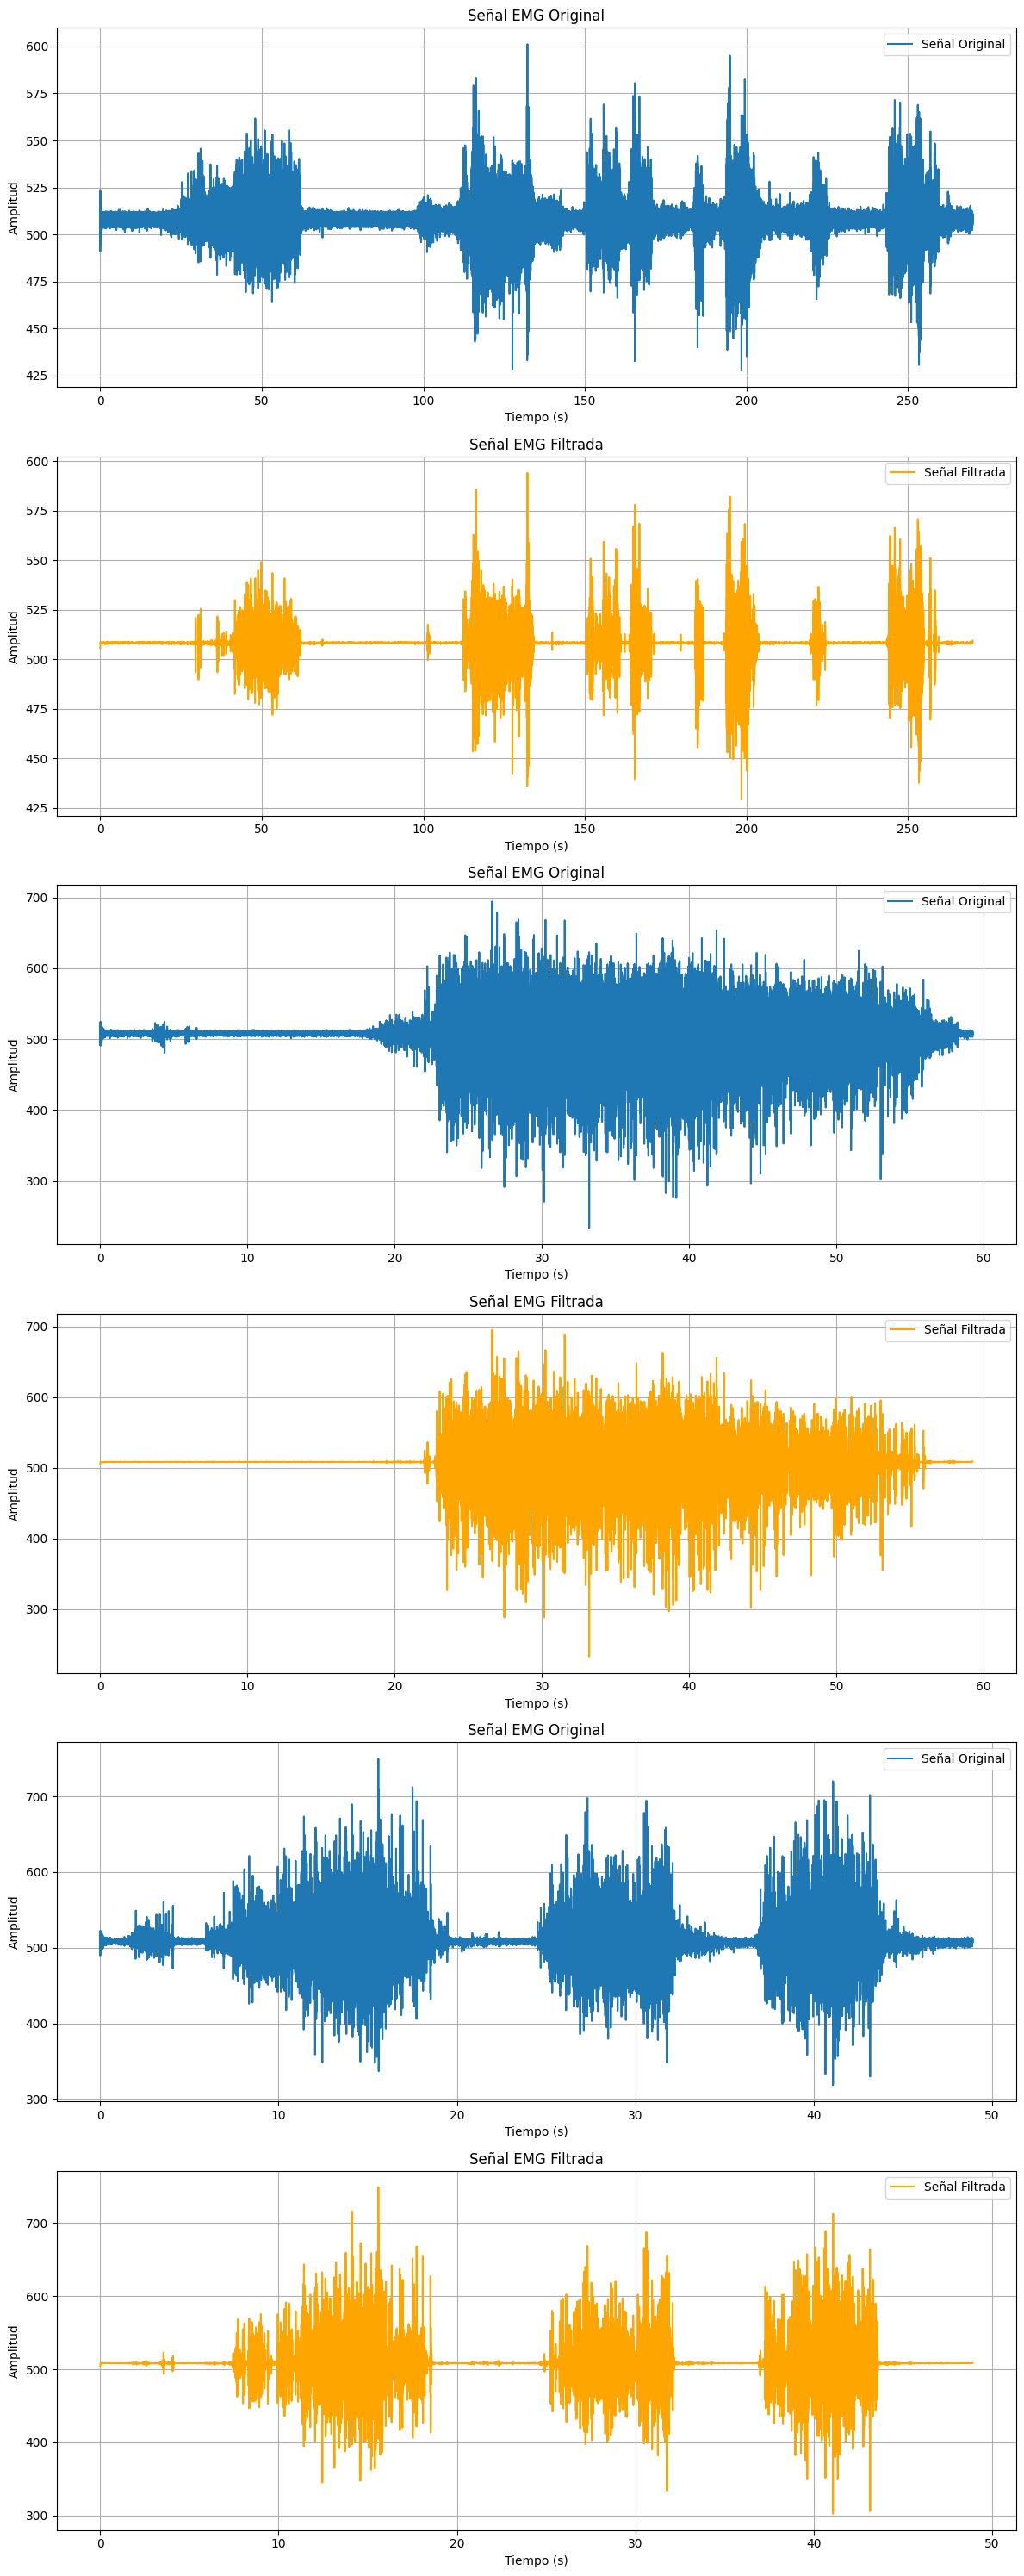

In [ ]:
array_1 = np.loadtxt("/content/Reposo_EMG.txt")
array_2=  np.loadtxt("/content/Levantando_Mochila_EMG.txt")
array_3= np.loadtxt("/content/Fuerza_oponente_EMG.txt")

array_1 = array_1[:, 5]
array_2 =array_2[:, 5]
array_3 =array_3[:, 5]

f_interferencia = 60  # Supongamos que la interferencia está a 60 Hz

# Crea el filtro Notch
Q = 30  # Factor de calidad
bw = f_interferencia / Q  # Ancho de banda del filtro Notch
f0 = f_interferencia  # Frecuencia central del filtro Notch
nyquist = 0.5 * 1000  # Frecuencia de Nyquist
w0 = f0 / nyquist  # Frecuencia normalizada
b, a = iirnotch(w0, Q)

# Aplica el filtro Notch a la señal de ECG
emg_reposo_filtrada = lfilter(b, a, array_1)
emg_lm_filtrada = lfilter(b, a, array_2)
emg_oponente_filtrada = lfilter(b, a, array_3)

fs = 1000  # frecuencia de muestreo en Hz
t1 = np.arange(len(emg_reposo_filtrada)) / fs
t2 = np.arange(len(emg_lm_filtrada)) / fs
t3 = np.arange(len(emg_oponente_filtrada)) / fs
# Descomposición wavelet
wavelet = 'db8'
level = 5
coeffs = pywt.wavedec(emg_reposo_filtrada, wavelet, level=level)
coeffs2 = pywt.wavedec(emg_lm_filtrada, wavelet, level=level)
coeffs3 = pywt.wavedec(emg_oponente_filtrada, wavelet, level=level)
threshold = 0.303  # Ajusta este valor según tus necesidades
for i in range(1, len(coeffs)):
    coeffs[i] = np.where(np.abs(coeffs[i]) < threshold * np.max(coeffs[i]), 0, coeffs[i])
for i in range(1, len(coeffs2)):
    coeffs2[i] = np.where(np.abs(coeffs2[i]) < threshold * np.max(coeffs2[i]), 0, coeffs2[i])
for i in range(1, len(coeffs3)):
    coeffs3[i] = np.where(np.abs(coeffs3[i]) < threshold * np.max(coeffs3[i]), 0, coeffs3[i])
# Reconstrucción de la señal filtrada
filtered_data1 = pywt.waverec(coeffs, wavelet)
filtered_data2 = pywt.waverec(coeffs2, wavelet)
filtered_data3 = pywt.waverec(coeffs3, wavelet)
# Plotear la señal original y la señal filtrada
plt.figure(figsize=(12, 30))

# Señal original
plt.subplot(6, 1, 1)
plt.plot(t1, emg_reposo_filtrada, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada
plt.subplot(6, 1, 2)
plt.plot(t1[:len(filtered_data1)], filtered_data1, label='Señal Filtrada', color='orange')
plt.title('Señal EMG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
# Señal original
plt.subplot(6, 1, 3)
plt.plot(t2, emg_lm_filtrada, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada
plt.subplot(6, 1, 4)
plt.plot(t2[:len(filtered_data2)], filtered_data2, label='Señal Filtrada', color='orange')
plt.title('Señal EMG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal original
plt.subplot(6, 1, 5)
plt.plot(t3, emg_oponente_filtrada, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada
plt.subplot(6, 1, 6)
plt.plot(t3[:len(filtered_data3)], filtered_data3, label='Señal Filtrada', color='orange')
plt.title('Señal EMG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

(0.0, 125000.0)

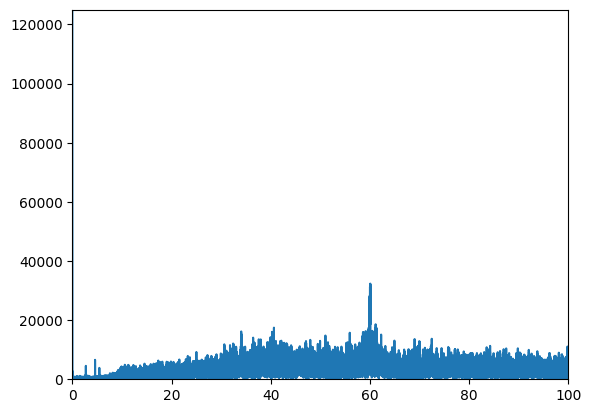

In [7]:
N1 = len(filtered_data1)
N2= len(filtered_data2)
N3=len(filtered_data3)
Fs=1000
D1 = np.fft.fft(filtered_data1,N1)
D2 = np.fft.fft(filtered_data2,N2)
D3 = np.fft.fft(filtered_data3,N3)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]

#magnitud para las cuatro señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)
D2m = np.abs(D2)
D2m = np.round(D2m,3)
D3m = np.abs(D3)
D3m = np.round(D3m,3)


#frecuencias
F1 = np.linspace(0, Fs/2, N1//2)
F2 = np.linspace(0, Fs/2, N2//2)
F3 = np.linspace(0, Fs/2, N3//2)

M = len(array_1)
n = np.arange(0,M)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales


plt.plot(F1,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])




(0.0, 125000.0)

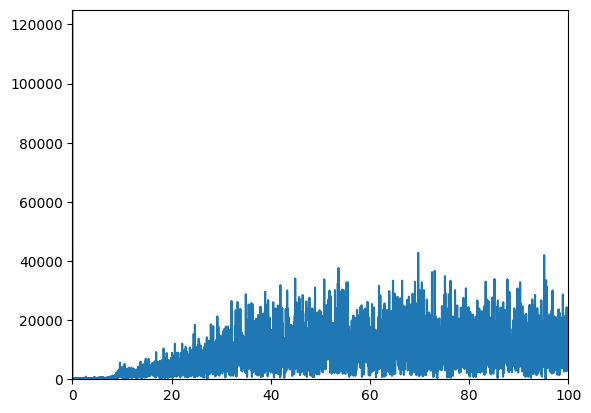

In [8]:
plt.plot(F2,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

(0.0, 125000.0)

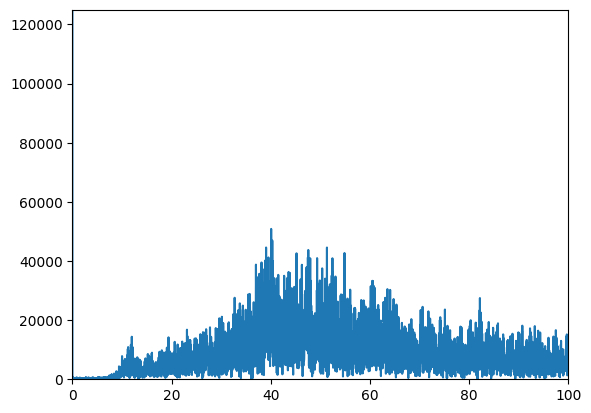

In [9]:
plt.plot(F3,D3m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

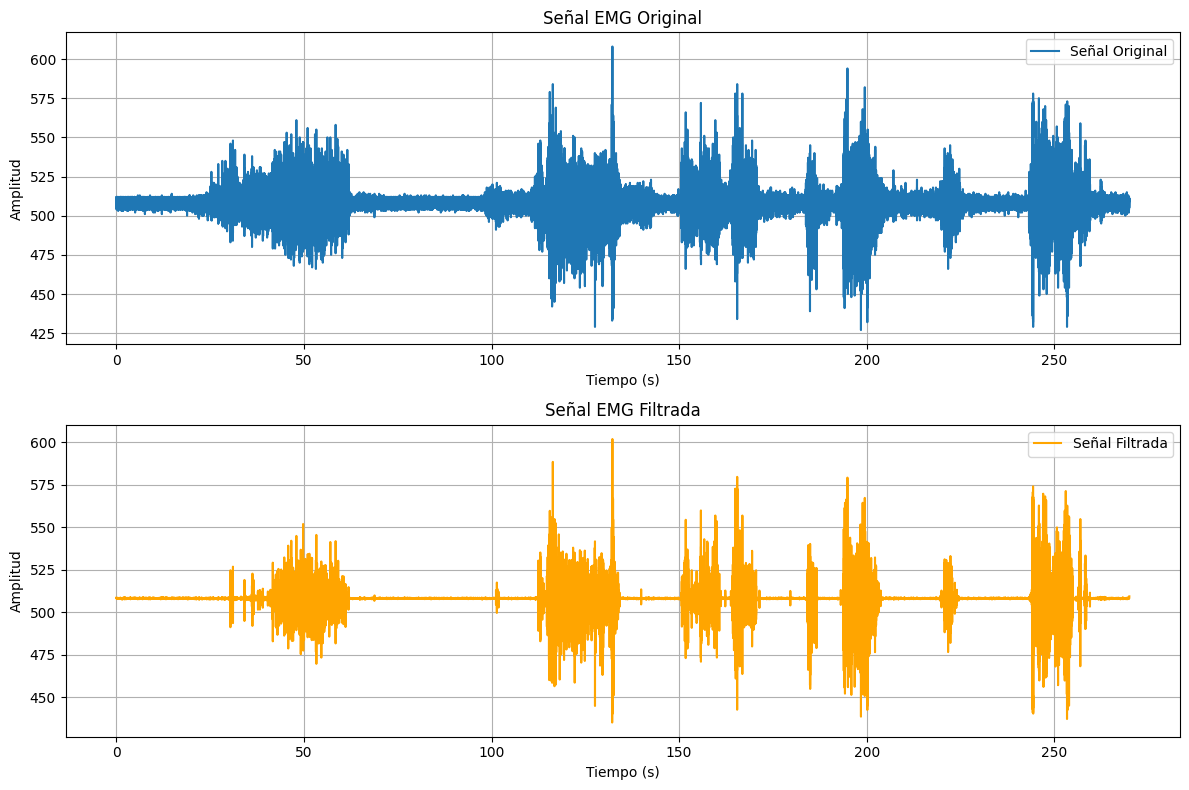

In [4]:
array_1 = np.loadtxt("/content/Reposo_EMG.txt")
array_2=  np.loadtxt("/content/Levantando_Mochila_EMG.txt")
array_3= np.loadtxt("/content/Fuerza_oponente_EMG.txt")

array_1 = array_1[:, 5]
array_2 =array_2[:, 5]
array_3 =array_3[:, 5]


fs = 1000  # frecuencia de muestreo en Hz
t = np.arange(len(array_1)) / fs

# Descomposición wavelet
wavelet = 'db8'
level = 5
coeffs1 = pywt.wavedec(array_1, wavelet, level=level)
coeffs22 = pywt.wavedec(array_2, wavelet, level=level)
coeffs33 = pywt.wavedec(array_3, wavelet, level=level)
threshold = 0.303  # Ajusta este valor según tus necesidades
for i in range(1, len(coeffs1)):
    coeffs1[i] = np.where(np.abs(coeffs1[i]) < threshold * np.max(coeffs1[i]), 0, coeffs1[i])
for i in range(1, len(coeffs22)):
    coeffs22[i] = np.where(np.abs(coeffs22[i]) < threshold * np.max(coeffs22[i]), 0, coeffs22[i])
for i in range(1, len(coeffs33)):
    coeffs33[i] = np.where(np.abs(coeffs33[i]) < threshold * np.max(coeffs33[i]), 0, coeffs33[i])
# Reconstrucción de la señal filtrada
filtered_data1 = pywt.waverec(coeffs1, wavelet)
filtered_data2 = pywt.waverec(coeffs22, wavelet)
filtered_data3 = pywt.waverec(coeffs33, wavelet)
# Plotear la señal original y la señal filtrada
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t,array_1, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t[:len(filtered_data1)], filtered_data1, label='Señal Filtrada', color='orange')
plt.title('Señal EMG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()